<a href="https://colab.research.google.com/github/tommyliverani/RulFramework/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model

Model utils to build and train a regressor



In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow_datasets as tfds
from Model import Model

In [8]:
url = 'https://raw.githubusercontent.com/tommyliverani/RulPrediction/main/data/'
data= pd.read_csv(url + 'final_normal_rul_data.csv')

#feature used as input
dt_in = list(data.columns[5:-3])

In [9]:
dt_in

['var:boottime',
 'avg:bytes_in',
 'var:bytes_in',
 'avg:bytes_out',
 'var:bytes_out',
 'avg:cpu_aidle',
 'var:cpu_aidle',
 'avg:cpu_idle',
 'var:cpu_idle',
 'avg:cpu_nice',
 'var:cpu_nice',
 'avg:cpu_speed',
 'var:cpu_speed',
 'avg:cpu_steal',
 'var:cpu_steal',
 'avg:cpu_system',
 'var:cpu_system',
 'avg:cpu_user',
 'var:cpu_user',
 'avg:cpu_wio',
 'var:cpu_wio',
 'avg:disk_free',
 'var:disk_free',
 'avg:disk_total',
 'var:disk_total',
 'avg:load_fifteen',
 'var:load_fifteen',
 'avg:load_five',
 'var:load_five',
 'avg:load_one',
 'var:load_one',
 'avg:mem_buffers',
 'var:mem_buffers',
 'avg:mem_cached',
 'var:mem_cached',
 'avg:mem_free',
 'var:mem_free',
 'avg:mem_shared',
 'var:mem_shared',
 'avg:mem_total',
 'var:mem_total',
 'avg:part_max_used',
 'var:part_max_used',
 'avg:pkts_in',
 'var:pkts_in',
 'avg:pkts_out',
 'var:pkts_out',
 'avg:proc_run',
 'var:proc_run',
 'avg:proc_total',
 'var:proc_total',
 'avg:swap_free',
 'var:swap_free',
 'avg:swap_total',
 'var:swap_total',
 'gex

In [10]:
data[dt_in]

,var:boottime,avg:bytes_in,var:bytes_in,avg:bytes_out,var:bytes_out,avg:cpu_aidle,var:cpu_aidle,avg:cpu_idle,var:cpu_idle,avg:cpu_nice,var:cpu_nice,avg:cpu_speed,var:cpu_speed,avg:cpu_steal,var:cpu_steal,avg:cpu_system,var:cpu_system,avg:cpu_user,var:cpu_user,avg:cpu_wio,var:cpu_wio,avg:disk_free,var:disk_free,avg:disk_total,var:disk_total,avg:load_fifteen,var:load_fifteen,avg:load_five,var:load_five,avg:load_one,var:load_one,avg:mem_buffers,var:mem_buffers,avg:mem_cached,var:mem_cached,avg:mem_free,var:mem_free,avg:mem_shared,var:mem_shared,avg:mem_total,var:mem_total,avg:part_max_used,var:part_max_used,avg:pkts_in,var:pkts_in,avg:pkts_out,var:pkts_out,avg:proc_run,var:proc_run,avg:proc_total,var:proc_total,avg:swap_free,var:swap_free,avg:swap_total,var:swap_total,gexec_0,machine_type_0,os_name_0,os_release_0,is_normal_state
0,0.0,0.001241,2.068363e-06,0.001776,1.952628e-06,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.142498,0.002955,0.968560,0.000315,0.0,0.0,0.997824,3.689334e-03,1.0,4.407686e-29,0.978847,0.000000,0.969758,3.442774e-07,0.950281,7.027665e-07,0.0,0.0,0.002533,0.000000e+00,0.956345,3.773780e-11,0.0,0.0,1.0,0.0,0.997743,0.0,0.014828,1.140149e-06,0.013392,1.930230e-06,0.028477,0.000434,0.000009,4.361038e-04,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.002177,4.235198e-06,0.002274,5.535008e-06,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.148716,0.002323,0.966899,0.000248,0.0,0.0,0.981264,5.993108e-04,1.0,0.000000e+00,0.978847,0.000000,0.969677,1.776915e-07,0.950159,2.871640e-07,0.0,0.0,0.002533,2.774520e-13,0.956325,7.495000e-08,0.0,0.0,1.0,0.0,0.997743,0.0,0.014480,3.893547e-05,0.014600,4.027201e-05,0.028556,0.001349,0.000010,4.393342e-03,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.000454,2.116223e-08,0.000330,3.309710e-10,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.145764,0.002246,0.967687,0.000240,0.0,0.0,0.986825,4.238182e-04,1.0,0.000000e+00,0.978847,0.000000,0.969802,4.432373e-07,0.950340,6.873827e-07,0.0,0.0,0.002533,0.000000e+00,0.956357,5.114142e-10,0.0,0.0,1.0,0.0,0.997743,0.0,0.002525,1.551870e-08,0.003430,1.432327e-08,0.028203,0.000000,0.000010,7.145620e-05,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.000241,2.860993e-08,0.000344,1.777200e-09,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.152044,0.003731,0.966010,0.000398,0.0,0.0,0.993352,2.361174e-03,1.0,4.407686e-29,0.978847,0.000000,0.969836,4.829006e-07,0.950525,1.914239e-06,0.0,0.0,0.002533,1.482634e-14,0.956278,8.557648e-08,0.0,0.0,1.0,0.0,0.997743,0.0,0.004180,1.831498e-05,0.003639,1.923904e-08,0.028360,0.000341,0.000009,3.890393e-04,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.000511,3.710120e-08,0.000281,1.217378e-09,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.126735,0.002177,0.972771,0.000232,0.0,0.0,0.989967,1.260728e-25,1.0,4.407686e-29,0.978847,0.000000,0.969650,3.604472e-31,0.950106,0.000000e+00,0.0,0.0,0.002533,1.331770e-13,0.956330,1.790940e-10,0.0,0.0,1.0,0.0,0.997743,0.0,0.011862,1.979380e-05,0.003227,6.635505e-08,0.028203,0.000000,0.000010,1.658853e-04,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82389,0.0,0.000114,8.162777e-09,0.000020,1.608078e-10,0.044586,0.0,0.899950,0.000150,0.0,0.0,0.0,0.0,0.0,0.0,0.045577,0.000019,0.085141,0.000104,0.0,0.0,0.311051,3.901273e-07,0.5,0.000000e+00,0.086801,0.000002,0.083022,2.332151e-07,0.076894,1.945176e-06,0.0,0.0,0.046164,9.396450e-11,0.800628,1.723714e-10,0.0,0.0,0.0,0.0,0.000000,0.0,0.001072,4.003618e-07,0.000221,8.572637e-09,0.038407,0.000020,0.760280,8.102445e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
82390,0.0,0.000803,2.083397e-07,0.000204,8.318979e-09,0.044586,0.0,0.886750,0.000091,0.0,0.0,0.0,0.0,0.0,0.0,0.051179,0.000007,0.096030,0.000064,0.0,0.0,0.310888,1.313093e-27,0.5,0.000000e+00,0.086365,0.00001

In [11]:
#feature used as output
data['rul']

0        0.556111
1        0.555983
2        0.555855
3        0.555727
4        0.555598
           ...   
82389    0.000513
82390    0.000385
82391    0.000257
82392    0.000128
82393    0.000000
Name: rul, Length: 82394, dtype: float64

##1 - Init the model 
Model(input_features,output_feature)

In [12]:
model=Model(input_features=dt_in,output_feature='rul')

##2 - Building the network

- build_net([[nodes,activation],..],optimizer='Adam',loss='mae')

Alternatively you can import a network

- import_model(network)


In [13]:
model.build_net([[64,'relu'],[64,'relu'],[64,'relu'],[64,'relu']],optimizer='Adam',loss='mae'))

In [14]:
model.net.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                3904      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 16,449
Trainable params: 16,449
Non-trainable params: 0
_________________________________________________________

## 3 - TRAINING THE NETWORK
- train(self,train_set, batch_size=10, validation_split=0.2, epochs=20, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])



In [15]:
model.train(data)

Epoch 1/20
6592/6592 [==============================] - 10s 1ms/step - loss: 0.1009 - val_loss: 0.1998
Epoch 2/20
6592/6592 [==============================] - 9s 1ms/step - loss: 0.0552 - val_loss: 0.2004
Epoch 3/20
6592/6592 [==============================] - 9s 1ms/step - loss: 0.0427 - val_loss: 0.2196


##RESULT

In [16]:
fig_size=(9, 3)
def plot_rul(pred=None, target=None,
        stddev=None,
        q1_3=None,
        same_scale=True,
        figsize=fig_size, autoclose=True):
    if autoclose:
        plt.close('all')
    plt.figure(figsize=figsize)
    if target is not None:
        plt.plot(range(len(target)), target, label='target',
                color='tab:orange')
    if pred is not None:
        if same_scale or target is None:
            ax = plt.gca()
        else:
            ax = plt.gca().twinx()
        ax.plot(range(len(pred)), pred, label='pred',
                color='tab:blue')
       # if stddev is not None:
       #     ax.fill_between(range(len(pred)),
       #             pred-stddev, pred+stddev,
       #             alpha=0.3, color='tab:blue', label='+/- std')
        if q1_3 is not None:
            ax.fill_between(range(len(pred)),
                    q1_3[0], q1_3[1],
                    alpha=0.3, color='tab:blue', label='1st/3rd quartile')
    plt.legend()
    plt.tight_layout()
    plt.show()

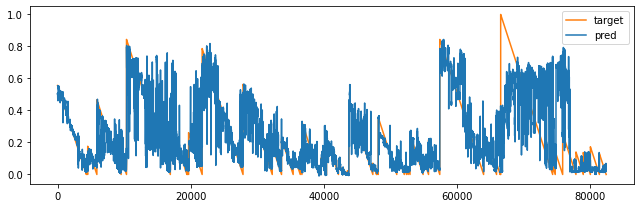

In [18]:
plot_rul(model.predict(data),data['rul'])